# `Heart Disease Prediction`

# Import - Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [70]:
df_origin = pd.read_csv(r'https://raw.githubusercontent.com/wasif-h/Heart_Disease_Prediction/refs/heads/main/heart.csv')
df = df_origin.copy()


# EDA

In [71]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
601,61,M,NAP,140,284,0,Normal,123,Y,1.3,Flat,1
231,40,M,NAP,130,281,0,Normal,167,N,0.0,Up,0
167,48,M,ATA,140,238,0,Normal,118,N,0.0,Up,0
694,56,M,ATA,120,236,0,Normal,178,N,0.8,Up,0
382,43,M,ASY,115,0,0,Normal,145,Y,2.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
286,59,M,ASY,140,169,0,Normal,140,N,0.0,Up,0
264,47,M,NAP,140,193,0,Normal,145,Y,1.0,Flat,1
714,50,F,ATA,120,244,0,Normal,162,N,1.1,Up,0
813,69,F,TA,140,239,0,Normal,151,N,1.8,Up,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [73]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [74]:

df.duplicated().sum()

np.int64(0)

In [75]:
df['HeartDisease'].value_counts()
# equally distributed

,count
HeartDisease,
1,508
0,410


In [76]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# Visualization of Data Distribution

### Numerical Data - Distribution

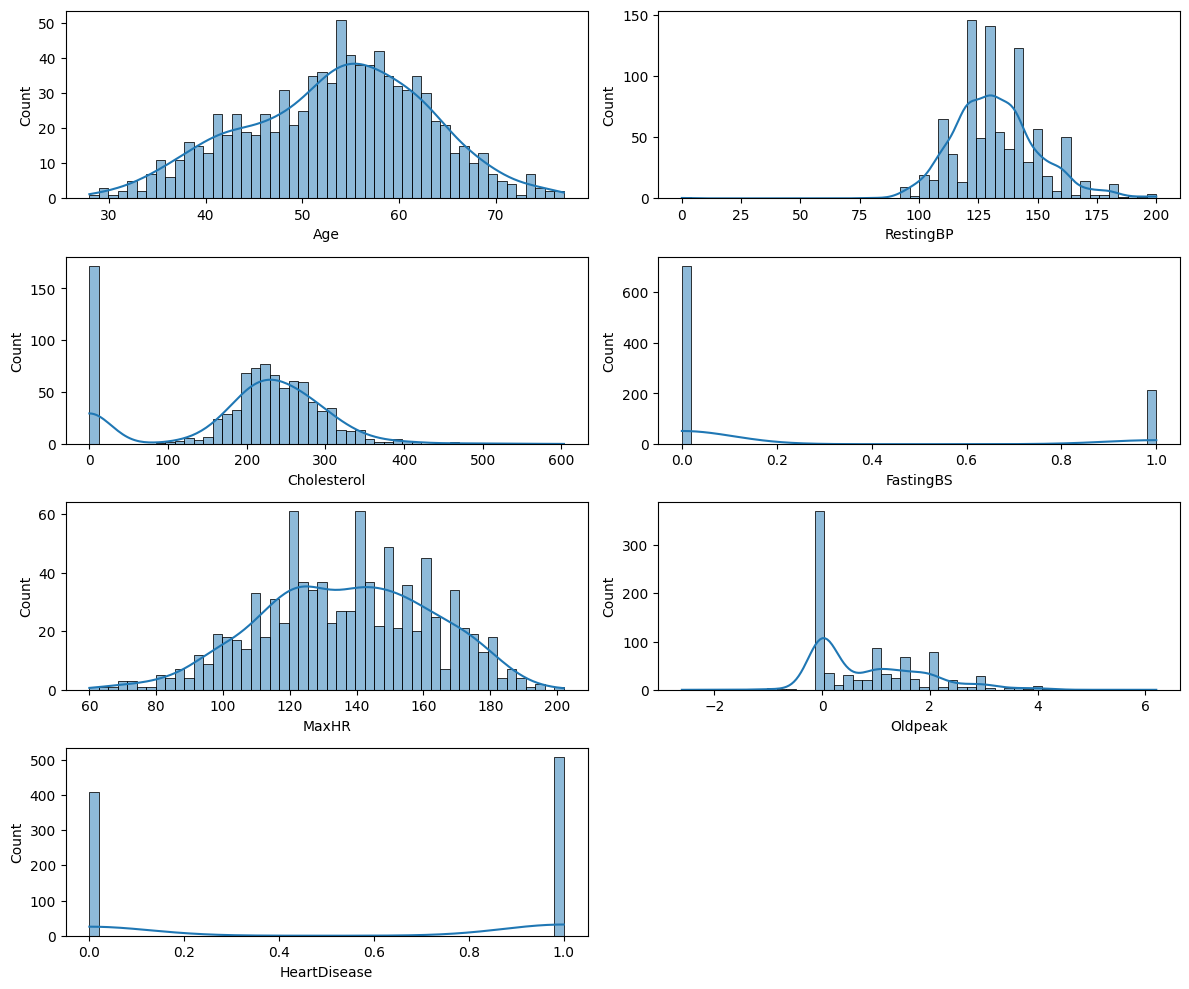

In [77]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
           'HeartDisease']
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()


for i, column in enumerate(num_col):
    sns.histplot(df[column], ax=axes[i], bins=50, kde=True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

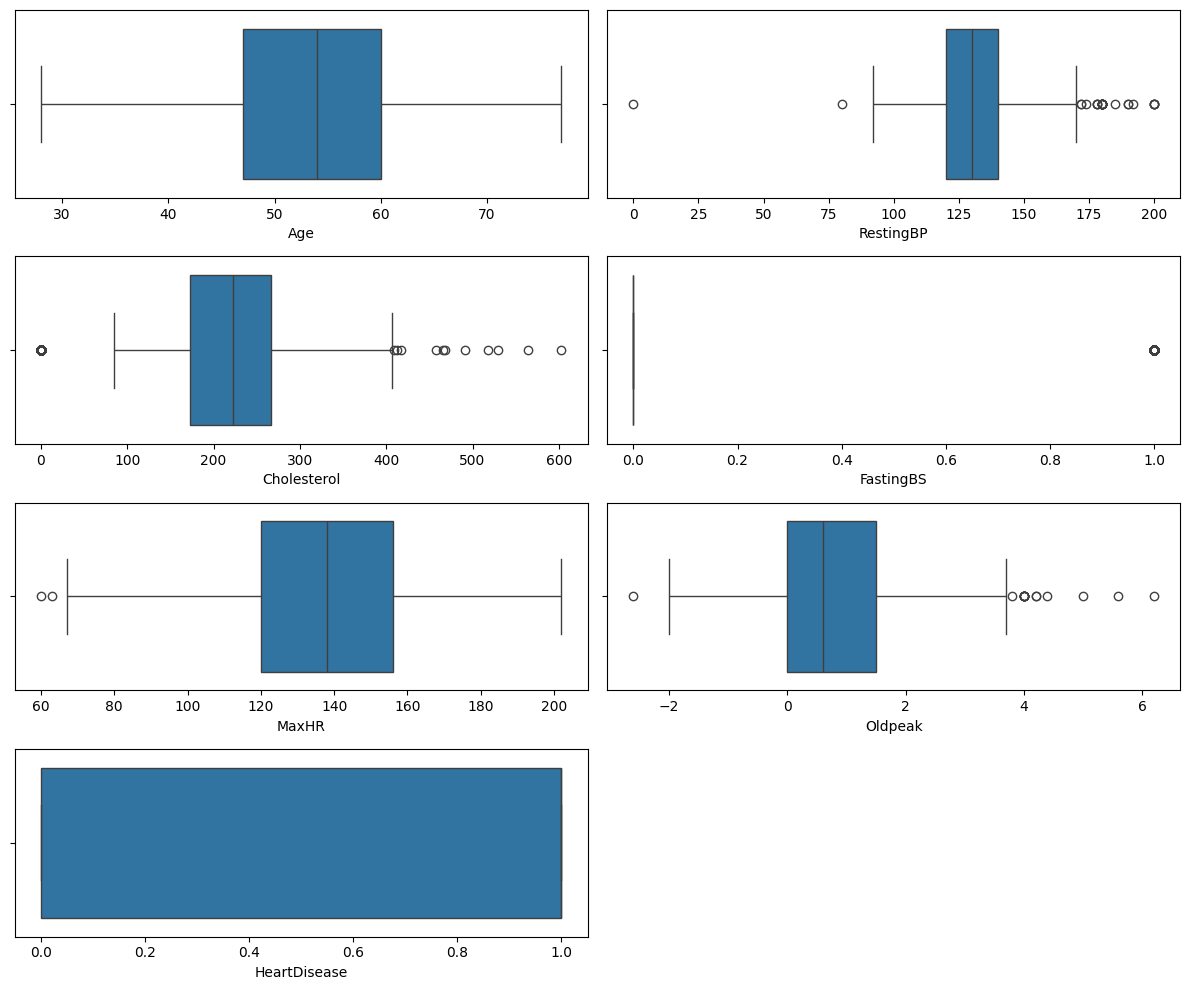

In [78]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()


for i, column in enumerate(num_col):
    sns.boxplot(x = df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Correlation using Heatmap

<Axes: >

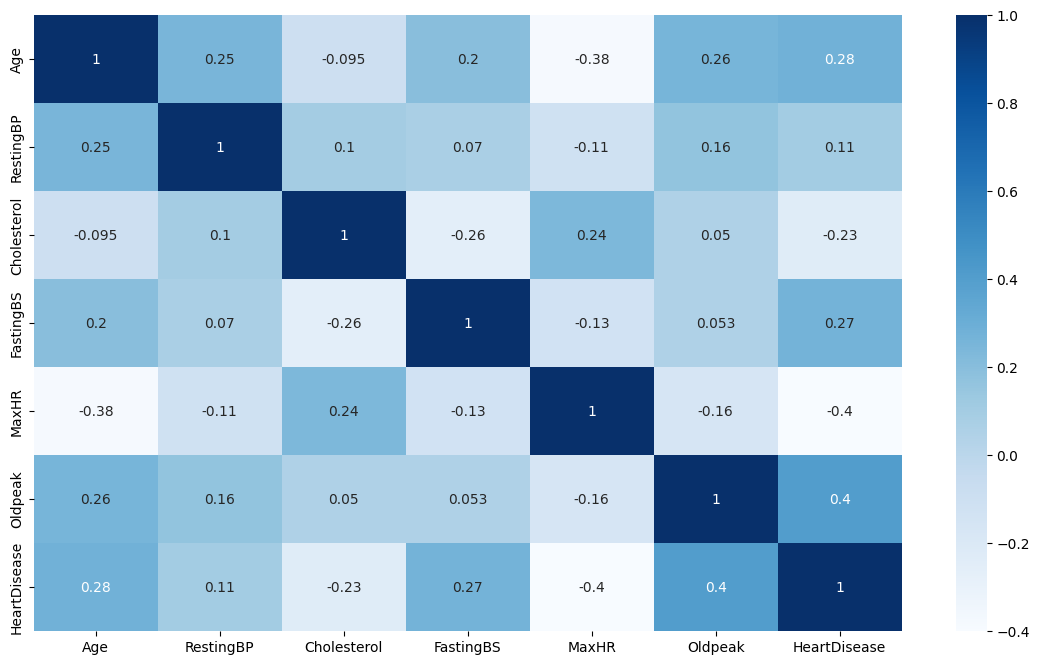

In [79]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

Numeric Conclusion - Drop MaxHR. It is not necessary to train the model

# Categorical Data - Distribution

In [80]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
844,52,M,TA,118,186,0,LVH,190,N,0.0,Flat,0
857,53,F,ASY,130,264,0,LVH,143,N,0.4,Flat,0
421,66,M,NAP,120,0,0,ST,120,N,-0.5,Up,0
366,61,M,ASY,150,0,0,Normal,117,Y,2.0,Flat,1
827,43,F,NAP,122,213,0,Normal,165,N,0.2,Flat,0
565,61,M,ASY,141,292,0,ST,115,Y,1.7,Flat,1
272,55,M,ASY,140,201,0,Normal,130,Y,3.0,Flat,1
224,55,M,ATA,120,256,1,Normal,137,N,0.0,Up,0
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
437,64,M,ASY,120,0,1,ST,106,N,2.0,Flat,1


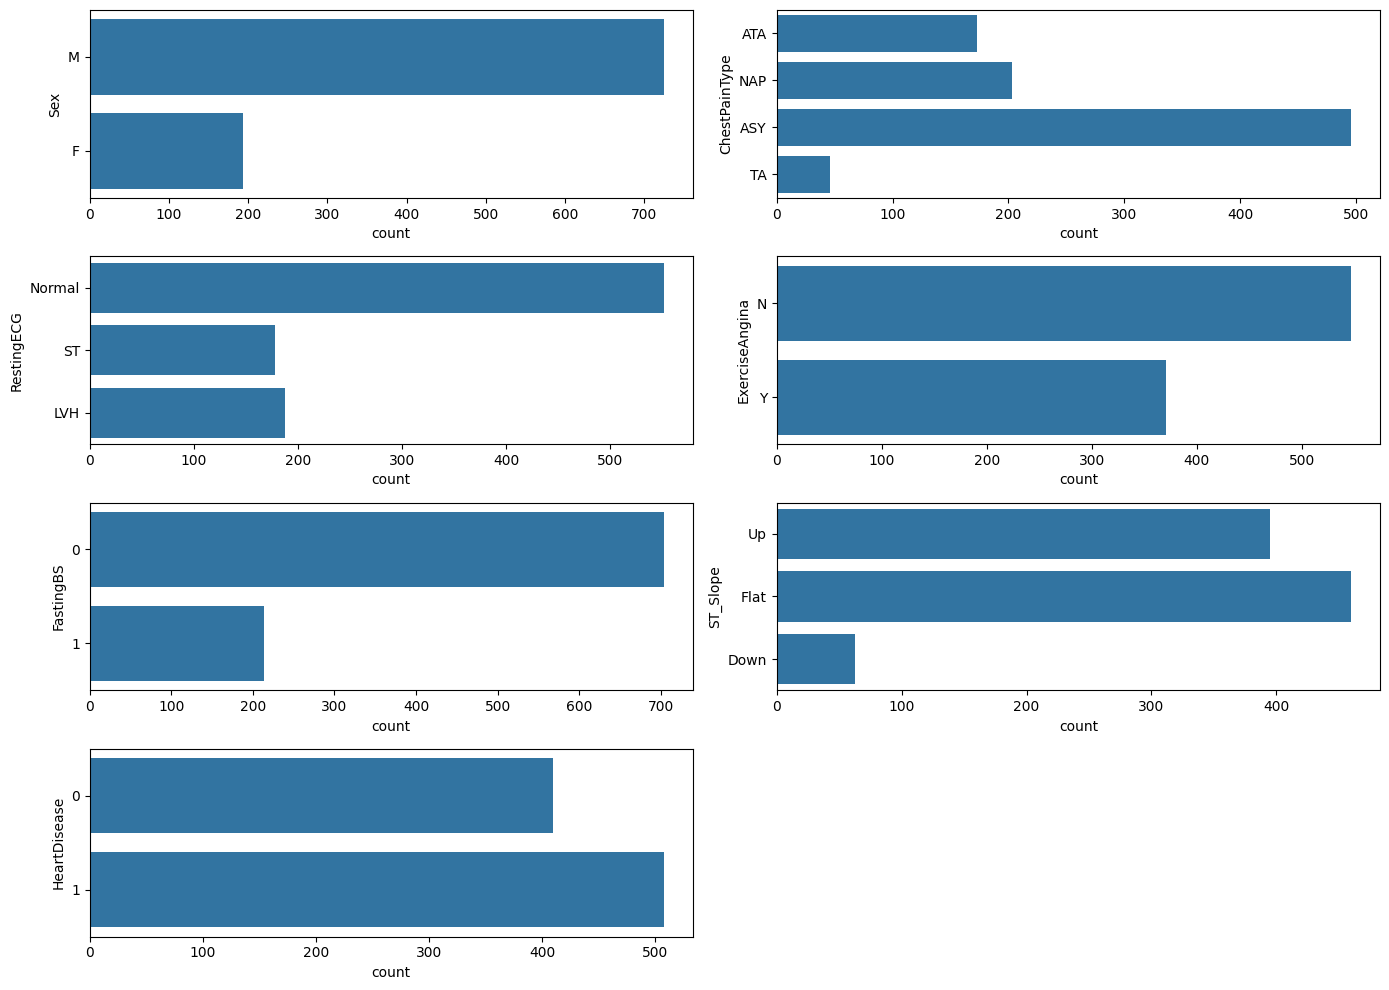

In [81]:
cat_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'FastingBS','ST_Slope','HeartDisease']

fig, axes = plt.subplots(4, 2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(cat_col):
    sns.countplot(y=df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Feature Engineering

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:
x = df.drop(columns=['HeartDisease','MaxHR'], axis=1)
y = df['HeartDisease']

In [84]:
le = LabelEncoder()
col_name = x.columns
for col in col_name:
  if x[col].dtype == 'object':
    x[col] = le.fit_transform(x[col])

In [85]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,0,0.0,2
1,49,0,2,160,180,0,1,0,1.0,1
2,37,1,1,130,283,0,2,0,0.0,2
3,48,0,0,138,214,0,1,1,1.5,1
4,54,1,2,150,195,0,1,0,0.0,2


In [86]:
scaler = StandardScaler()
x[col_name] = scaler.fit_transform(x[col_name])

In [87]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.823556,-0.832432,1.052114


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Classification Models

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [90]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

results = []

In [91]:

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Name' : name,
        'Accuracy': round(acc*100,4),
        'F1 Score': round(f1*100,4)
    })



In [92]:
result_df = pd.DataFrame(results)
result_df

,Name,Accuracy,F1 Score
0,Logistic Regression,85.3261,86.8293
1,K-Nearest Neighbors,84.2391,85.9903
2,Decision Tree,80.9783,82.9268
3,Support Vector Machine,86.9565,88.6792
4,Naive Bayes,84.7826,86.4078


In [93]:
import joblib